In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import plotting
import matplotlib.pyplot as plt #Data Visualization
import seaborn as sns  #Python library for Vidualization

In [2]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [3]:
import os
from google.colab import files

uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
dataset = pd.read_csv('Mall_Customers.csv')

In [5]:
dataset.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income (k$)      2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 78.3+ KB


In [7]:
print('This dataset contains ',dataset.shape[0],'rows')
print('This dataset contains ',dataset.shape[1],'columns')

This dataset contains  2000 rows
This dataset contains  5 columns


In [8]:
print("Mean of Annual Income (k$) of Female:",dataset['Annual Income (k$)'].loc[dataset['Gender'] == 'Female'].mean())
print("Mean of Annual Income (k$) of Male:",dataset['Annual Income (k$)'].loc[dataset['Gender'] == 'Male'].mean())

Mean of Annual Income (k$) of Female: 58.837599293909975
Mean of Annual Income (k$) of Male: 62.47289504036909


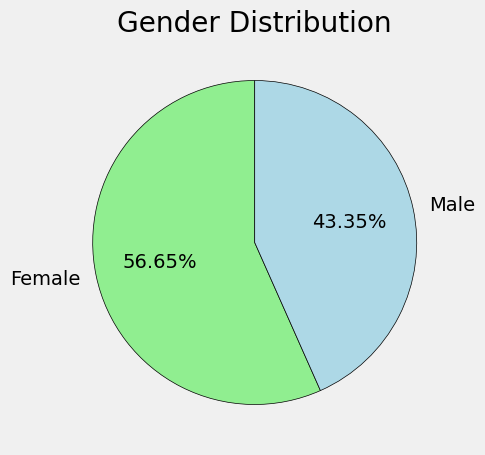

In [9]:
plt.figure(figsize=(5, 5))
pd.Series(dataset['Gender']).value_counts().plot(
    kind='pie',
    autopct='%1.2f%%',
    colors=['lightgreen', 'lightblue'],
    startangle=90,
    wedgeprops={'edgecolor': 'black'}
)

plt.title("Gender Distribution")
plt.ylabel("")
plt.show()

In [10]:
dataset['Gender'].value_counts()

,count
Gender,
Female,1133
Male,867


In [11]:
dataset.groupby('Gender').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,,
Female,1040.775816,38.148279,58.837599,51.773169
Male,947.867359,40.242215,62.472895,48.622837


### Checking for Missing Values

In [12]:
missing_df =dataset.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name', 'Missing Values Count']
missing_df['Filling Factor (%)']=(dataset.shape[0]-missing_df['Missing Values Count'])/dataset.shape[0]*100
missing_df.sort_values('Filling Factor (%)').reset_index(drop = True)

,Column Name,Missing Values Count,Filling Factor (%)
0,CustomerID,0,100.0
1,Gender,0,100.0
2,Age,0,100.0
3,Annual Income (k$),0,100.0
4,Spending Score (1-100),0,100.0


### Plotting the Annual Income Column vs the Spending Score

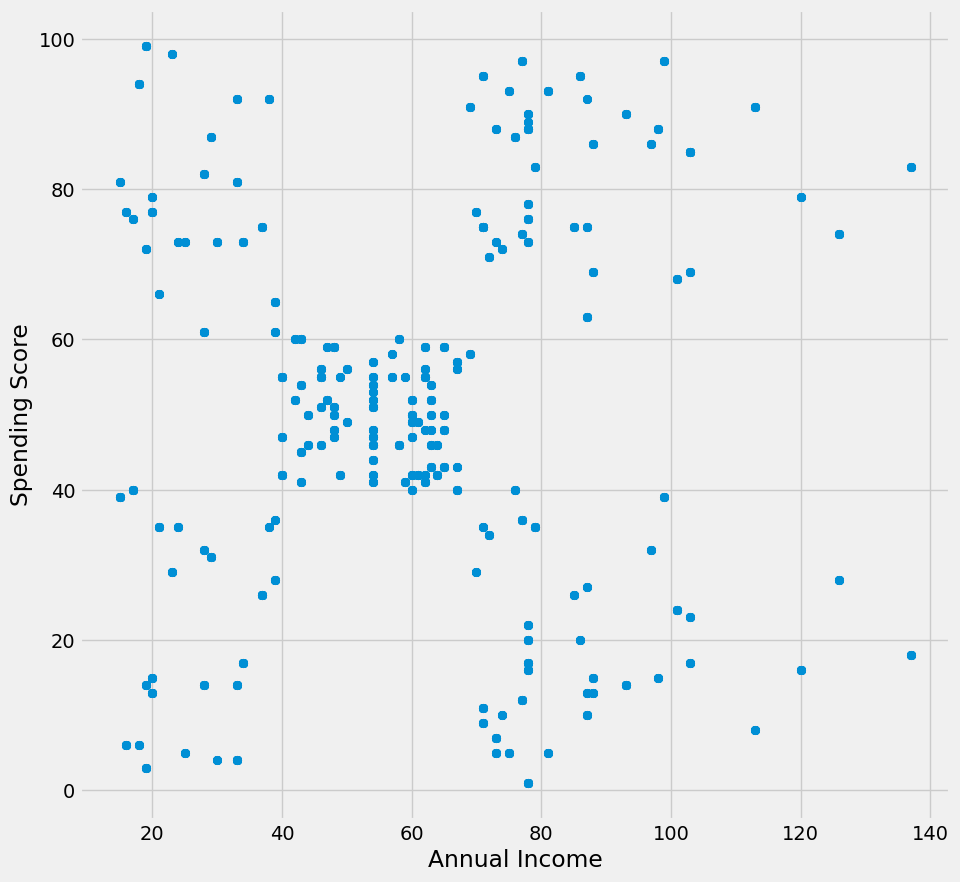

In [13]:
plt.figure(figsize = (10, 10))
plt.scatter(dataset["Annual Income (k$)"], dataset["Spending Score (1-100)"])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

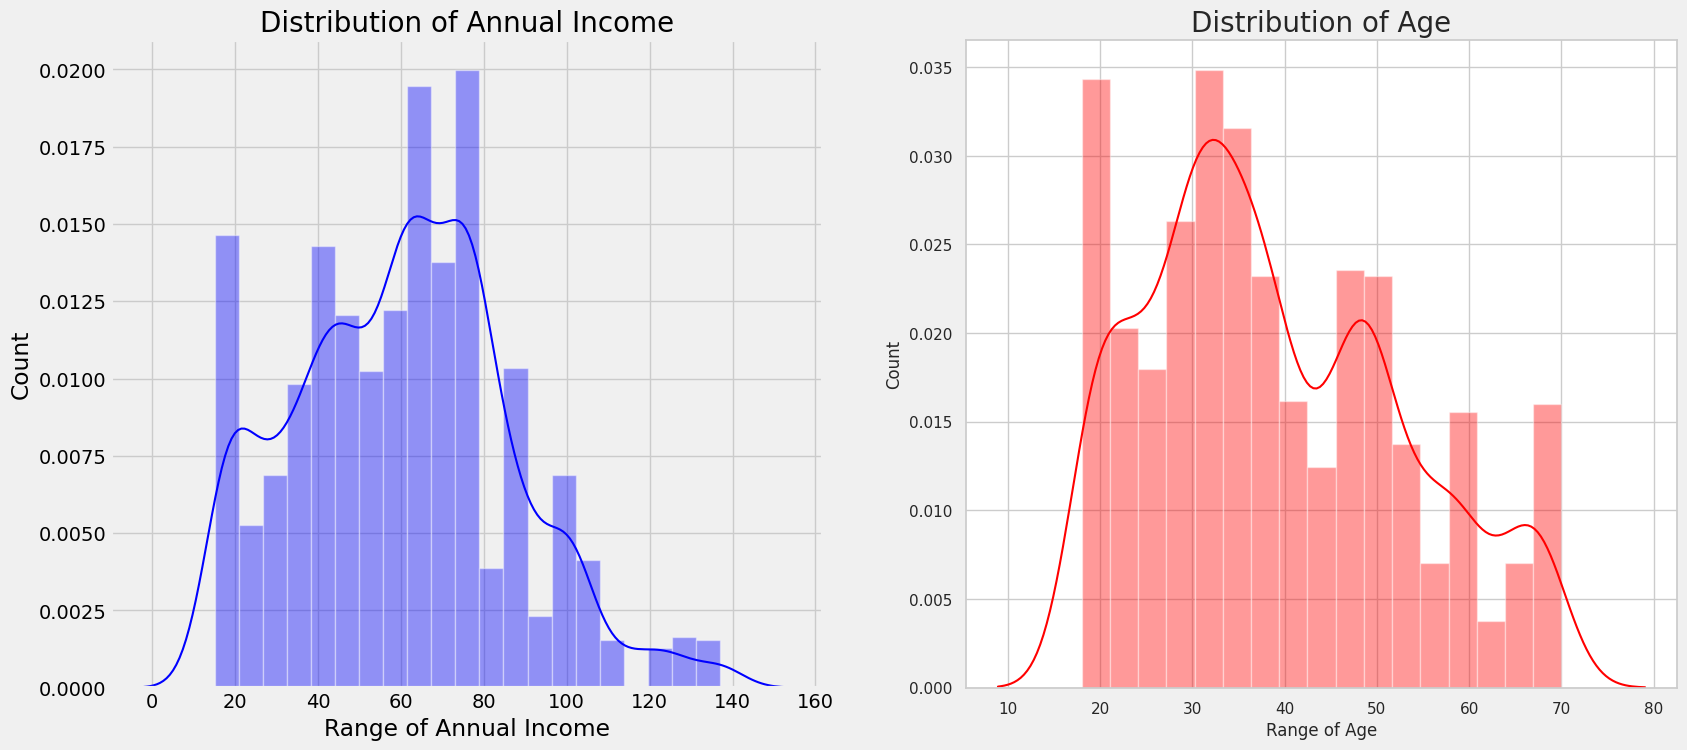

In [14]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'], color = 'blue')
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

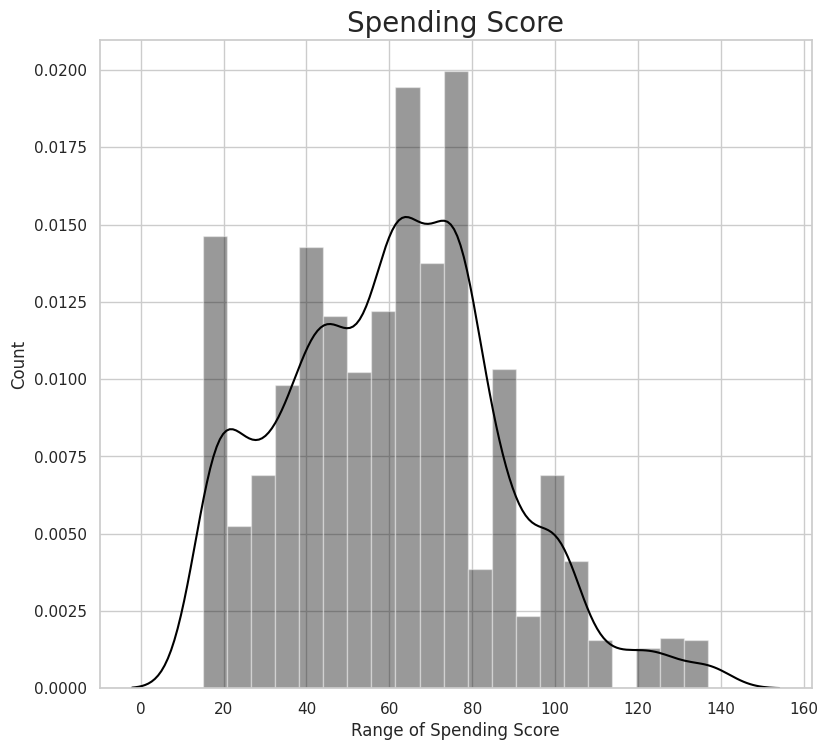

In [15]:
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(dataset['Annual Income (k$)'], color = 'black')
plt.title('Spending Score', fontsize = 20)
plt.xlabel('Range of Spending Score')
plt.ylabel('Count')


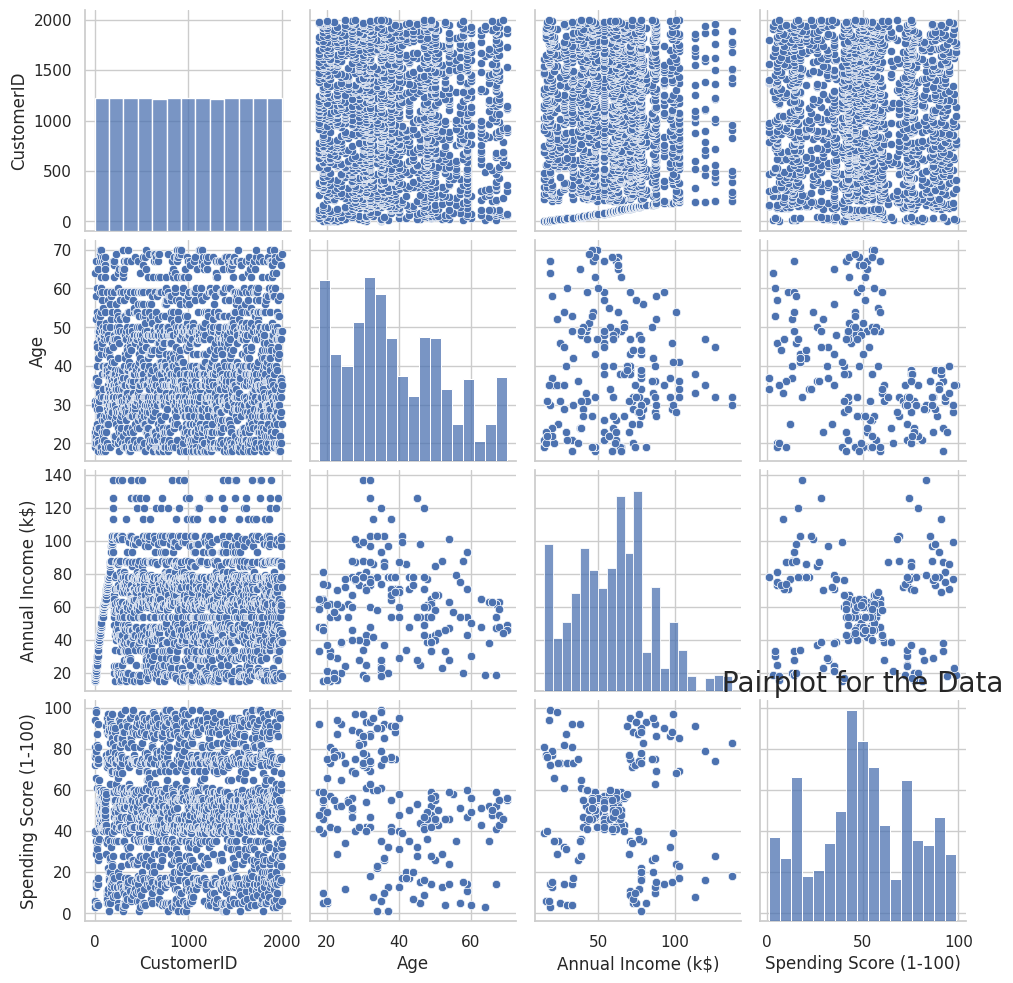

In [16]:
sns.pairplot(dataset)
plt.title('Pairplot for the Data', fontsize = 20)
plt.show()

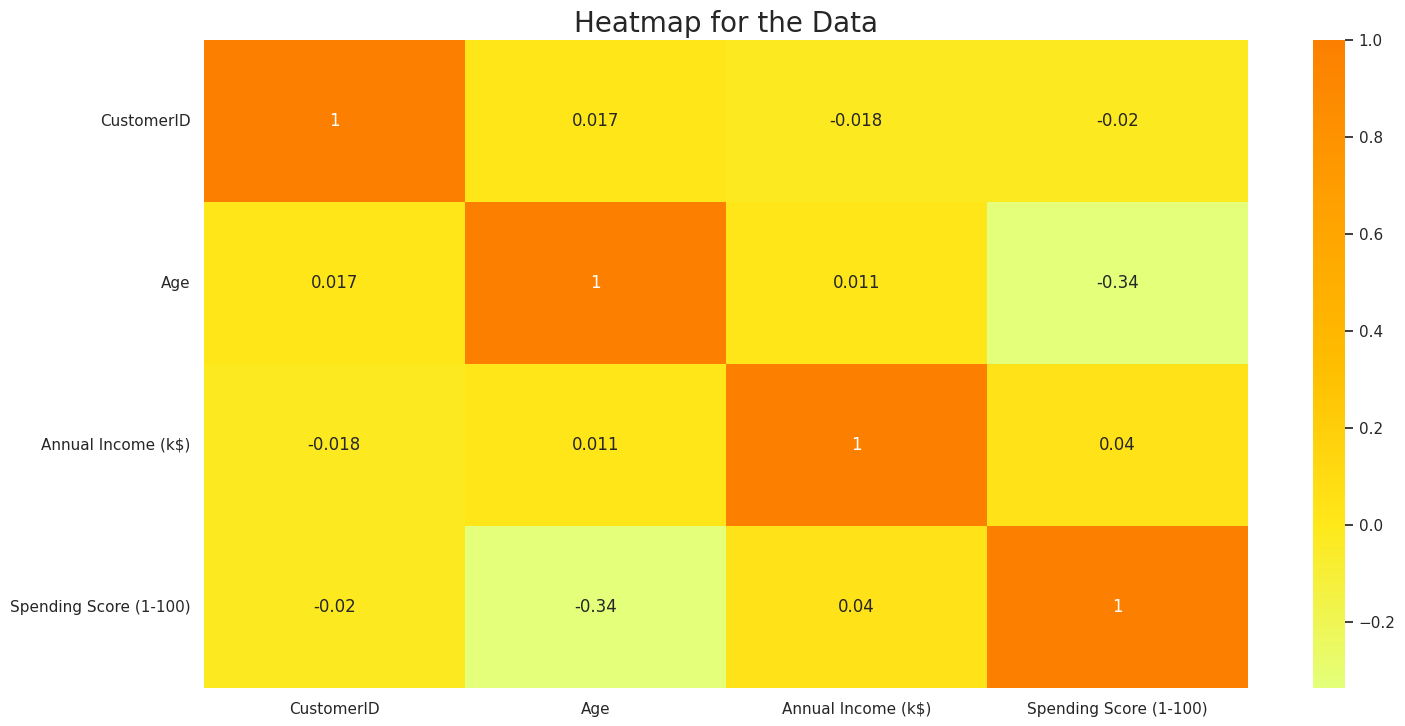

In [17]:
plt.rcParams['figure.figsize'] = (15, 8)
numerical_features  = dataset.select_dtypes(include=['number'])
sns.heatmap(numerical_features.corr(), cmap = 'Wistia', annot = True)
plt.title('Heatmap for the Data', fontsize = 20)
plt.show()

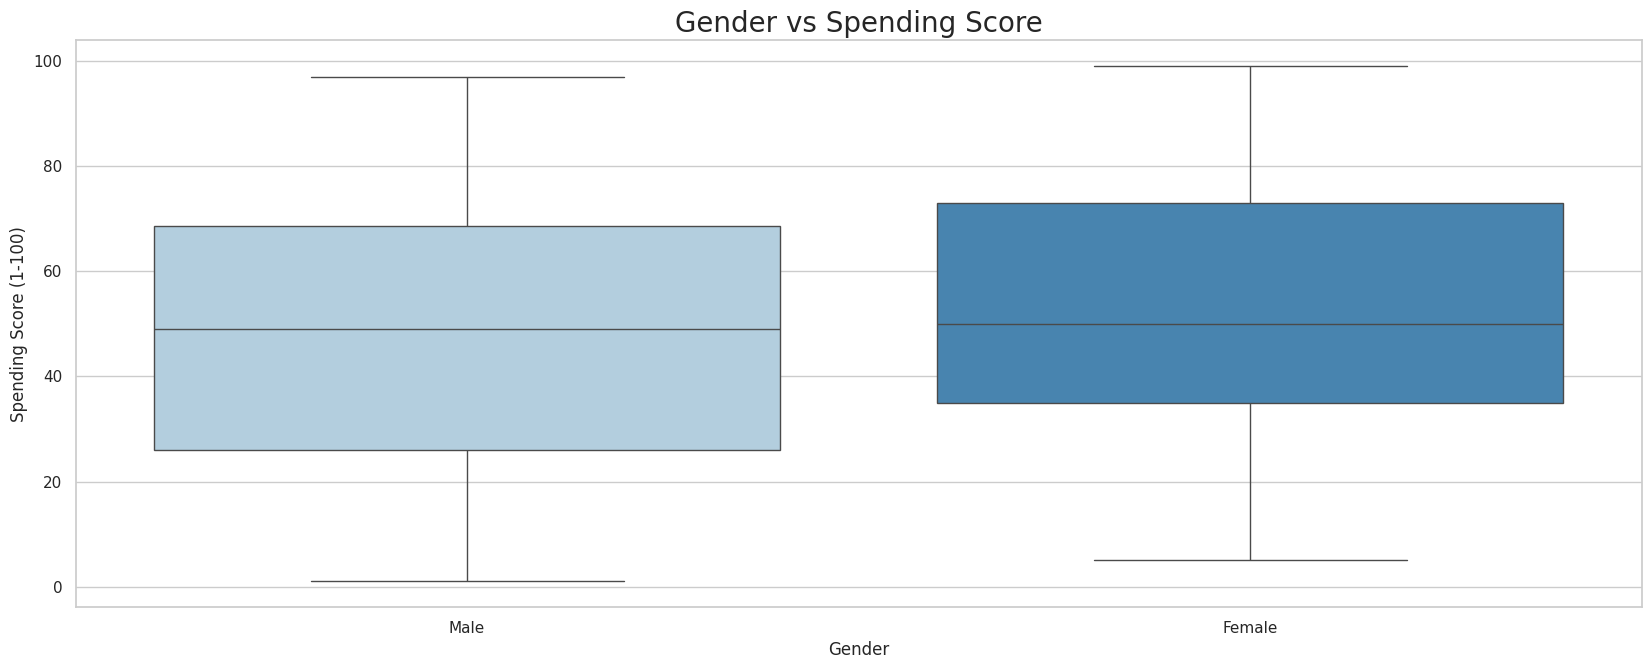

In [18]:
plt.rcParams['figure.figsize'] = (18, 7)
sns.boxplot(x = dataset['Gender'], y = dataset['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

### The Model Building Process

Feature Selection for Model Building Purposes

In [19]:
X= dataset.iloc[:, [3,4]].values

Model Building Process

In [20]:
#Building the Model
#KMeans Algorithm to decide the optimum cluster number , KMeans++ using Elbow Mmethod
#to figure out K for KMeans, I will use ELBOW Method on KMEANS++ Calculation
from sklearn.cluster import KMeans
wcss=[]

# We always assume the max number of cluster would be 15
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,15):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

### Visualizing the ELBOW Method to get the Optimal Value of K

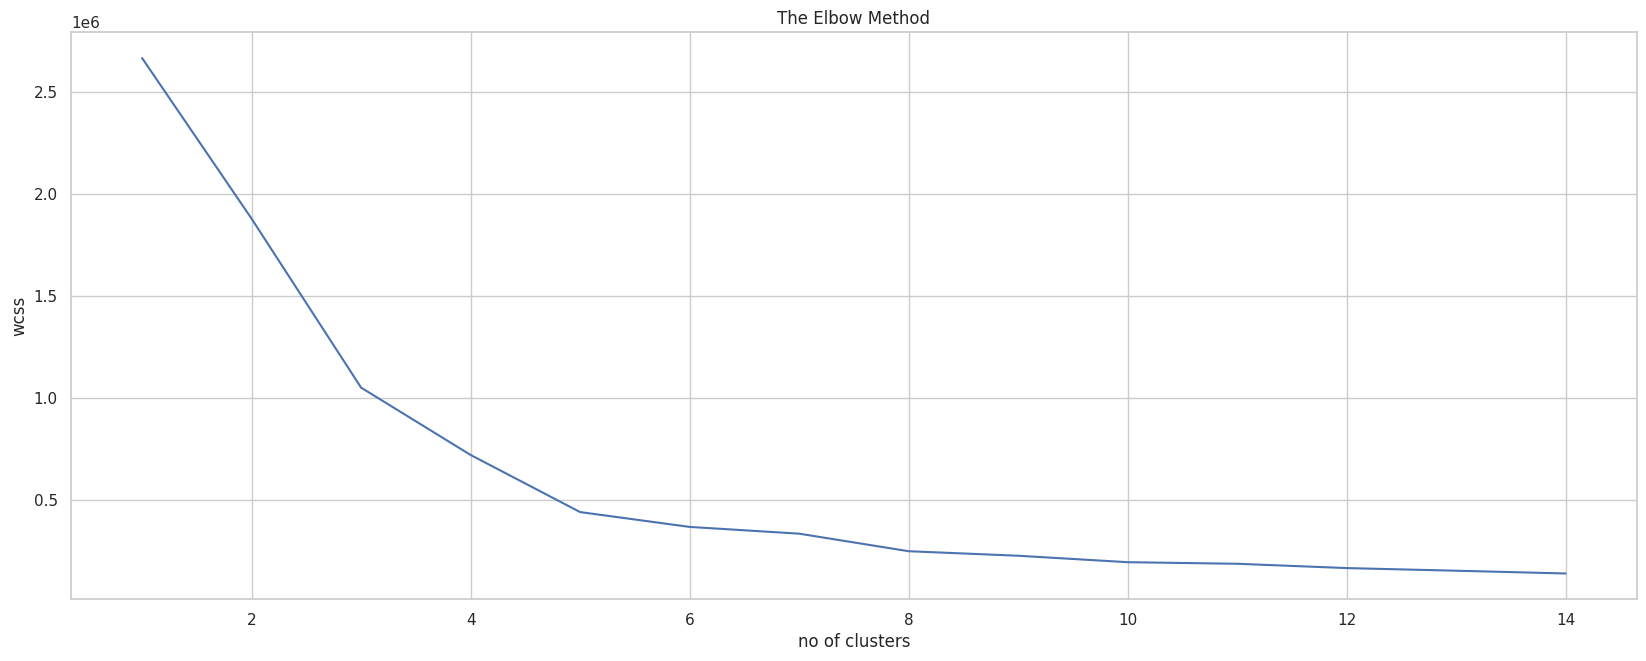

In [21]:
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

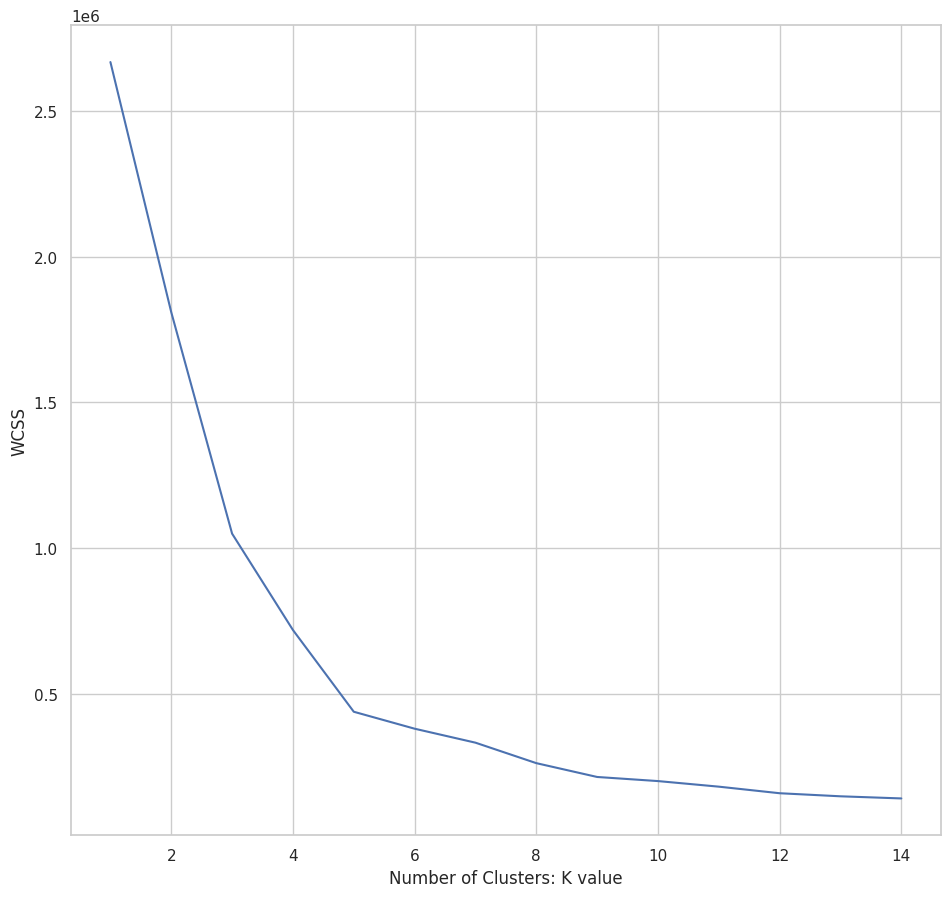

In [22]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1,15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(X)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1,15), wcss)
plt.xlabel("Number of Clusters: K value")
plt.ylabel("WCSS")
plt.show()

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
newdf = X
kmeans = KMeans(n_clusters = 5, init='k-means++',random_state=42)
kmeans.fit(newdf)

# Now, print the silhouette score of this model

print("silhouette_score is :",silhouette_score(newdf, kmeans.labels_, metric='euclidean'))

silhouette_score is : 0.5619191633836139


In [25]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

### Visualizing All the Clusters

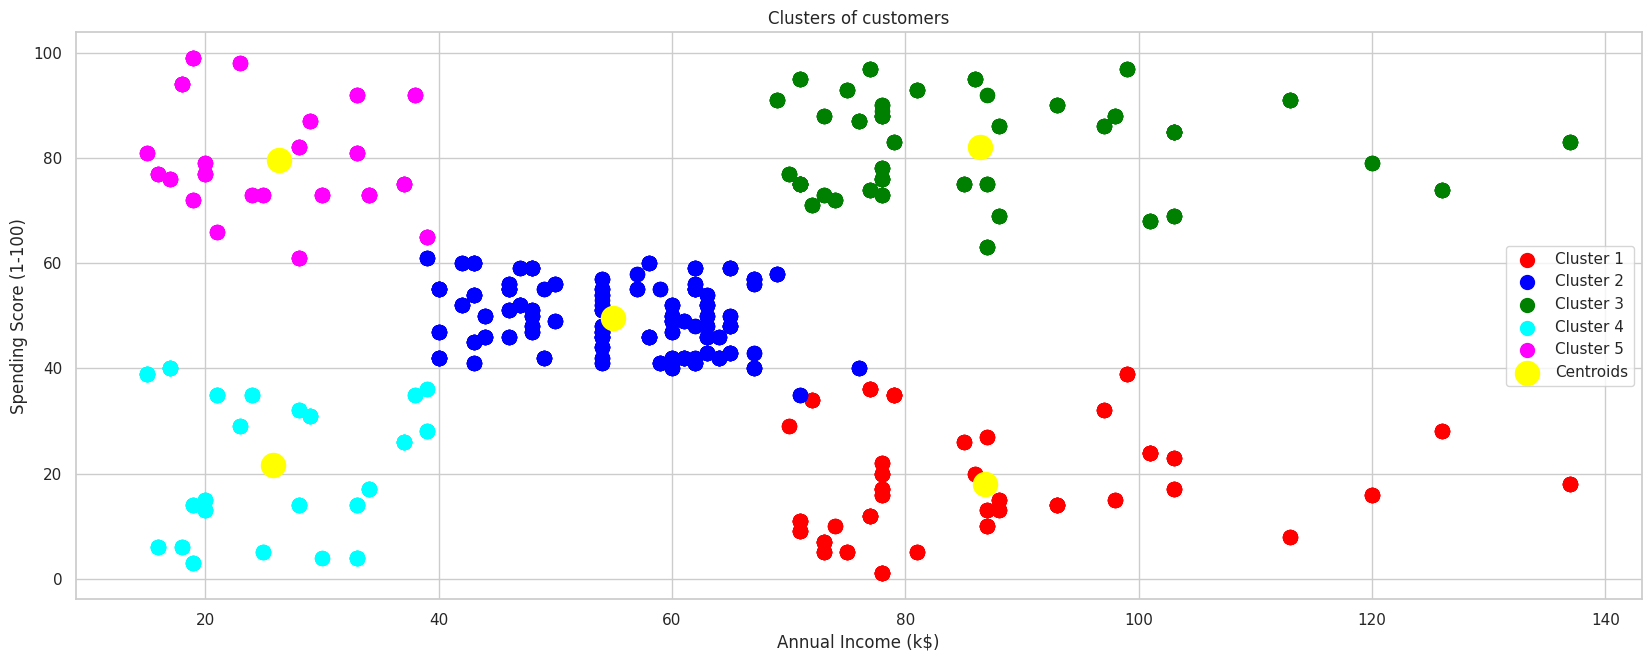

In [26]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

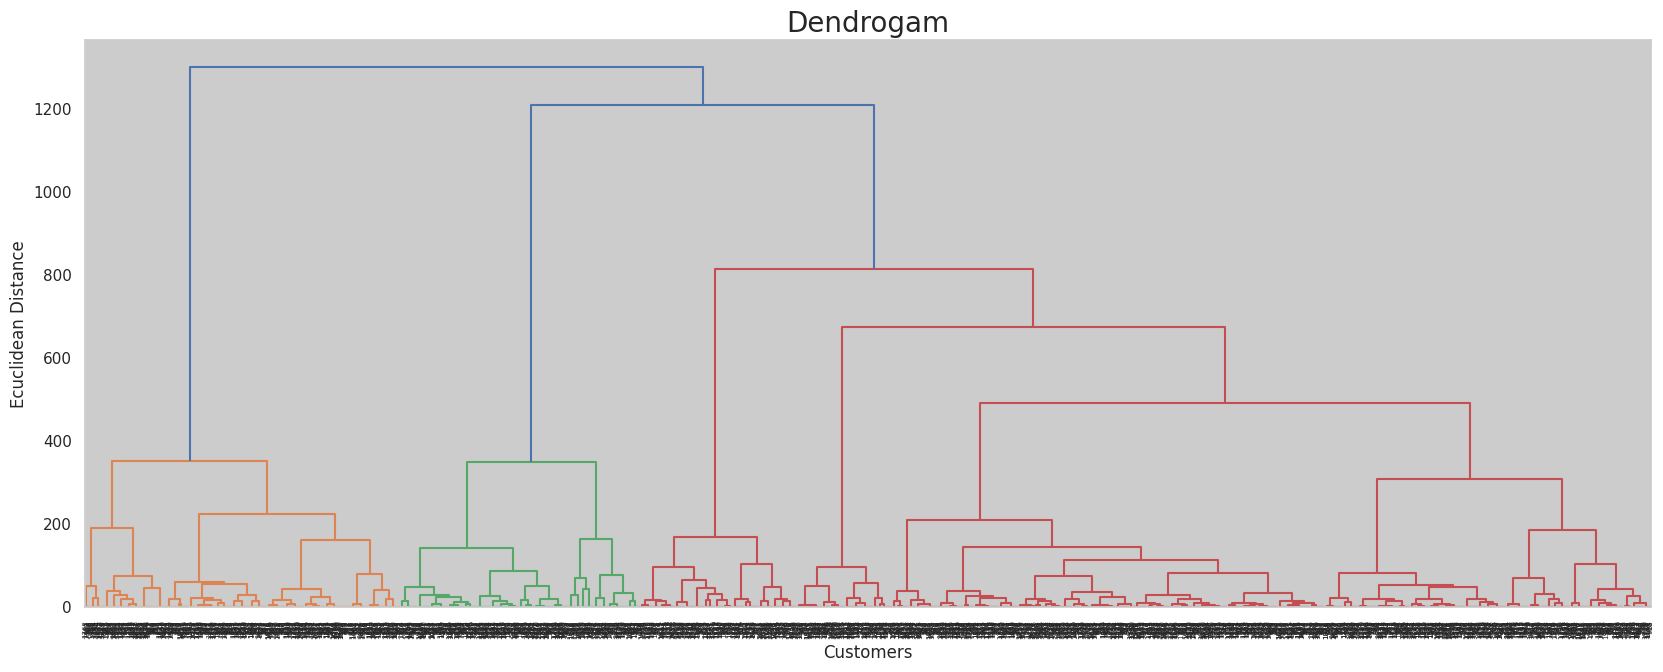

In [27]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

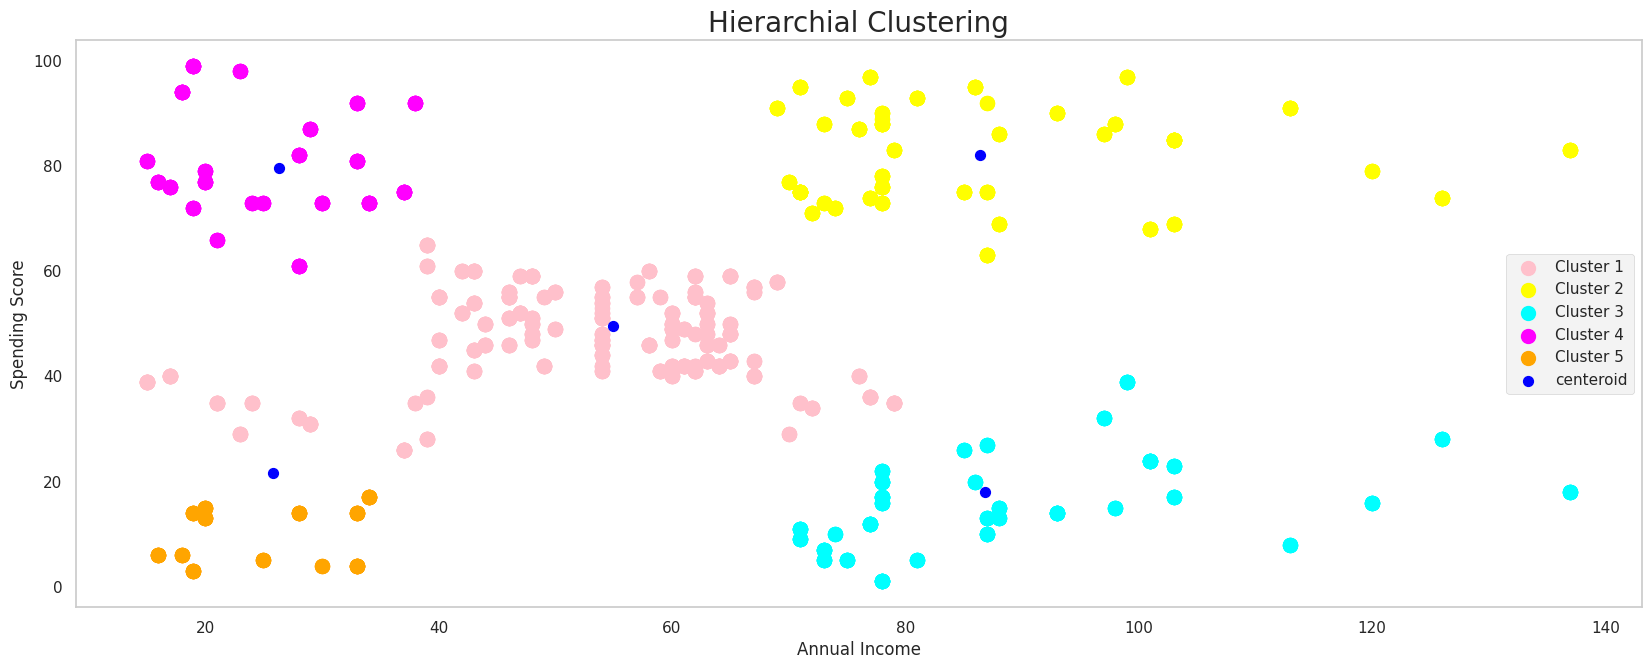

In [28]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, linkage = 'ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'pink', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'orange', label = 'Cluster 5')
plt.scatter(kmeansmodel.cluster_centers_[:,0], kmeansmodel.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

In [29]:
Y = dataset.iloc[:, [2, 4]].values
Y.shape

(2000, 2)

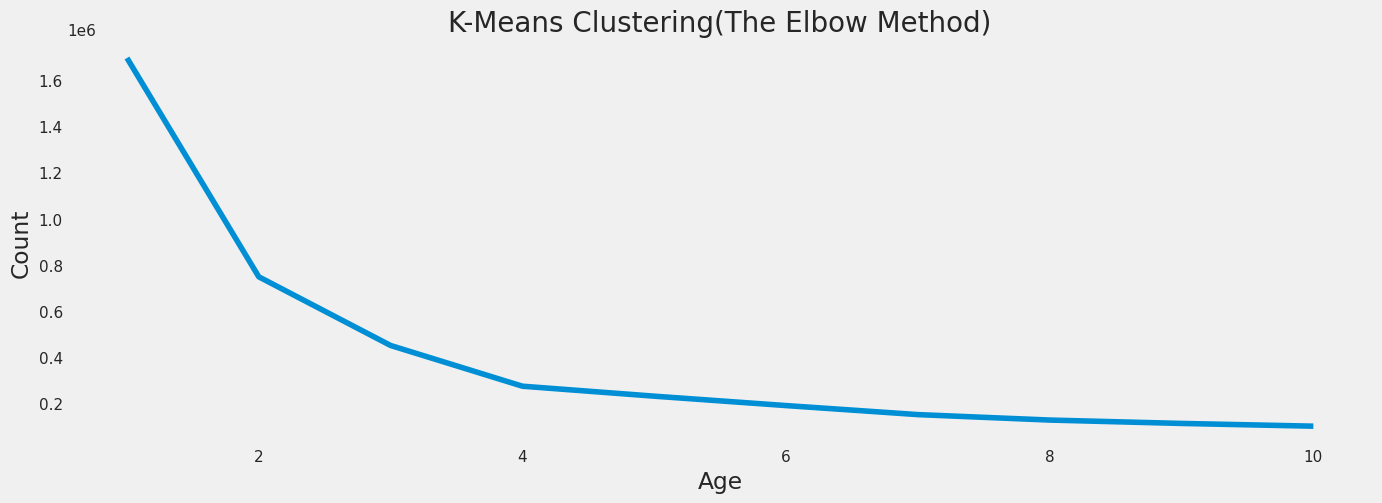

In [30]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

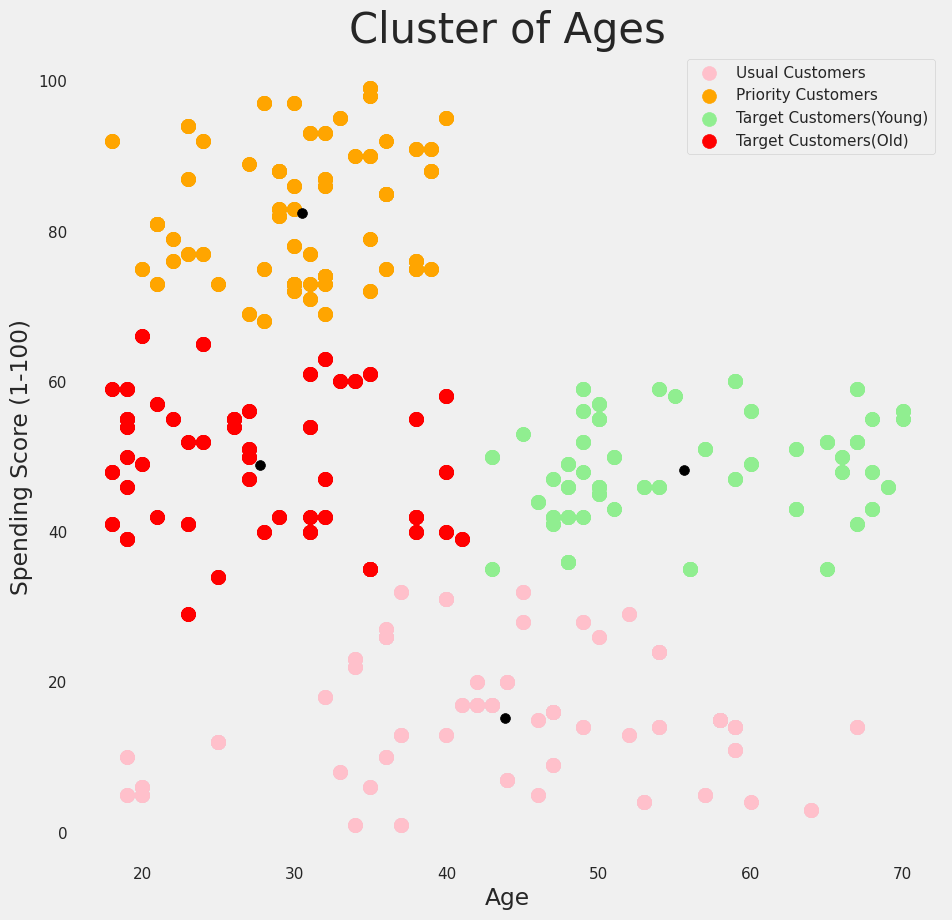

In [31]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(Y)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(Y[ymeans == 0, 0], Y[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(Y[ymeans == 1, 0], Y[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(Y[ymeans == 2, 0], Y[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers(Young)')
plt.scatter(Y[ymeans == 3, 0], Y[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

In [32]:
x = dataset[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
km.fit(Y)
labels = km.labels_
centroids = km.cluster_centers_

In [33]:
dataset['labels'] =  labels
trace1 = go.Scatter3d(
    x= dataset['Age'],
    y= dataset['Spending Score (1-100)'],
    z= dataset['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = dataset['labels'],
        size= 10,
        line=dict(
            color= dataset['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

layout = go.Layout(
    title = 'Character vs Gender vs Alive or not',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

In [34]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 122.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [35]:

import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


2025-03-24 23:47:17.248 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 23:47:17.565 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-24 23:47:17.568 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 23:47:17.569 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 23:47:17.570 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 23:47:17.571 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new
caching commands, `st.cache_data` or `st.cache_resource`. More information
[in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cac

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income (k$)      2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 78.3+ KB


2025-03-24 23:47:18.686 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 23:47:18.695 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 23:47:18.815 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 23:47:19.250 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 23:47:19.251 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 23:47:19.374 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 23:47:20.036 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-24 23:47:20.041 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

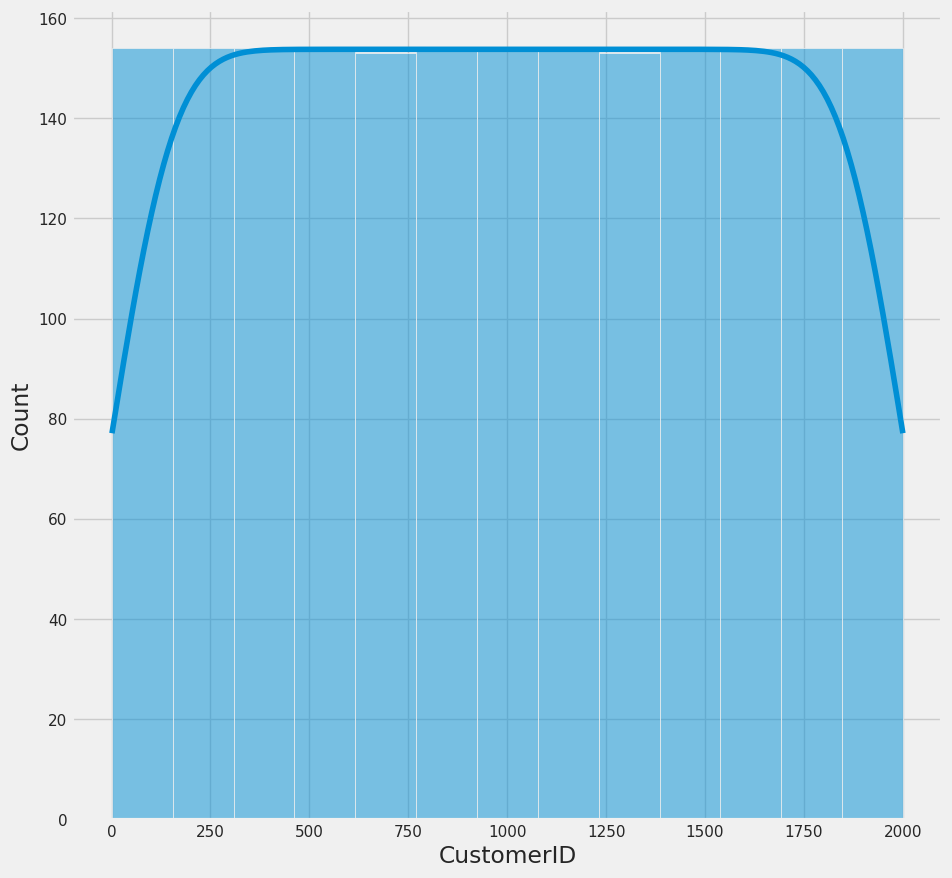

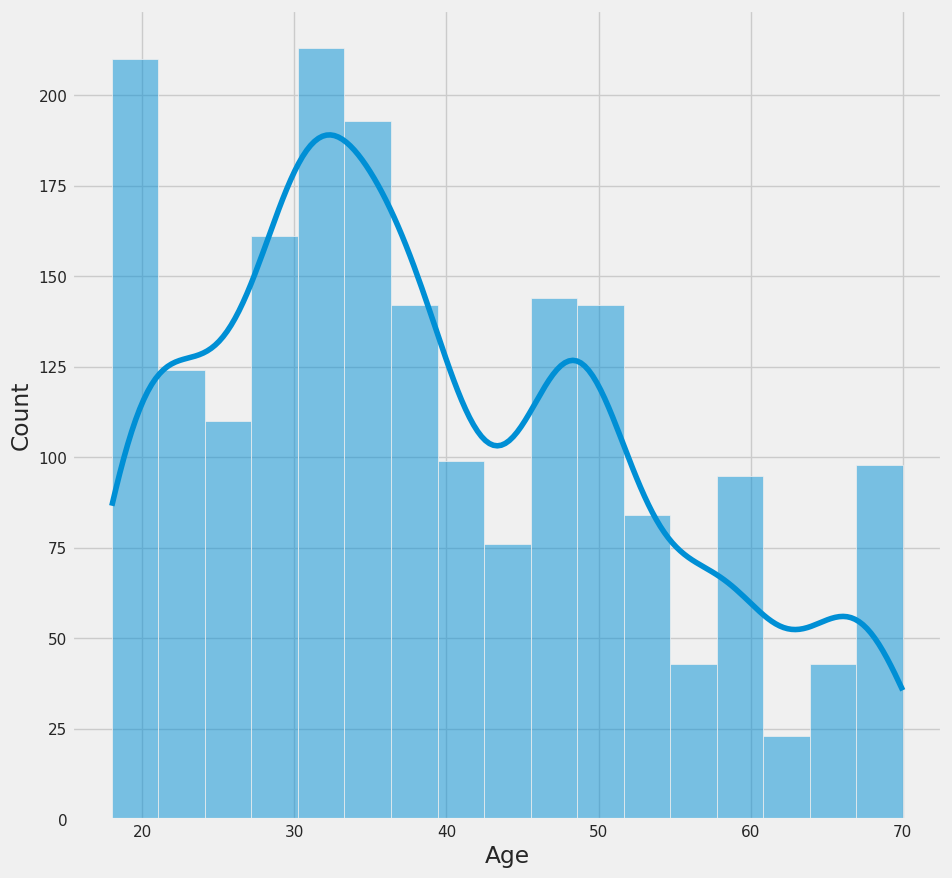

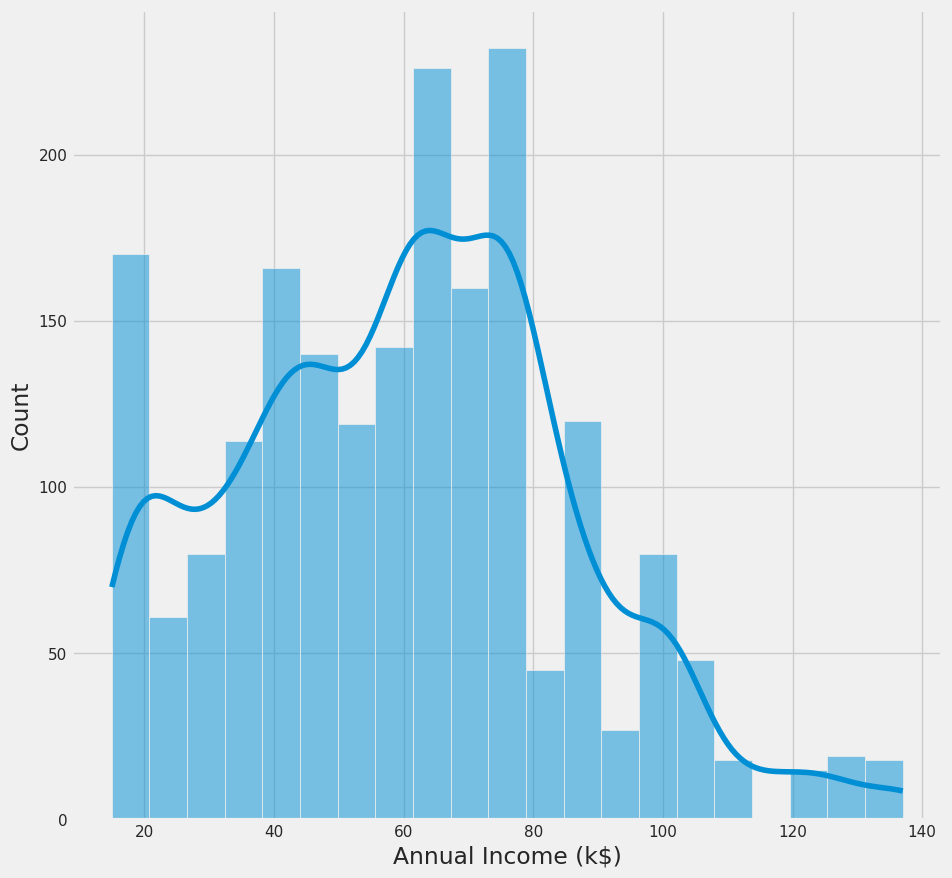

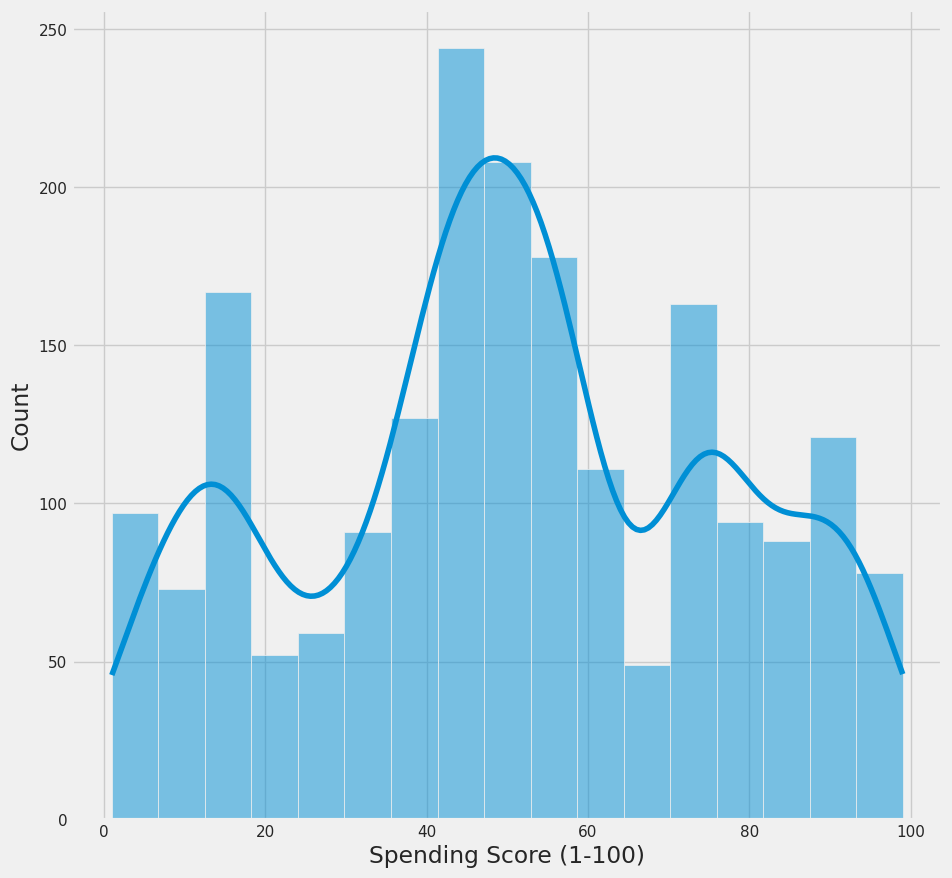

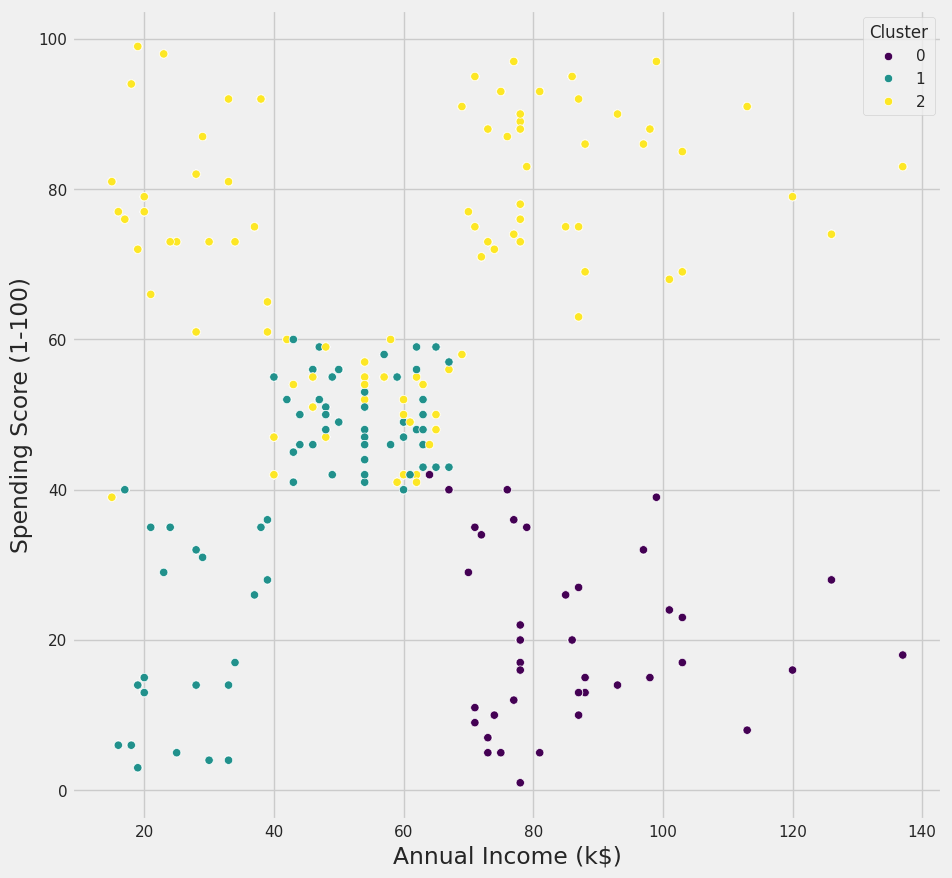

In [36]:
# Title of the web app
st.title("Customer Segmentation")

# Load the data
@st.cache
def load_data():
    data = pd.read_csv("/content/Mall_Customers.csv")  # Use the actual path to your dataset
    return data

data = load_data()

# Show the raw data if user wants
if st.checkbox("Show Raw Data"):
    st.write(data)

# Exploratory Data Analysis (EDA)
st.header("Exploratory Data Analysis (EDA)")

# Display basic information and statistics
st.subheader("Basic Information")
st.write(data.info())

st.subheader("Statistical Summary")
st.write(data.describe())

# Show distribution of numerical columns
st.subheader("Distribution of Numerical Features")
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    fig, ax = plt.subplots()
    sns.histplot(data[col], kde=True, ax=ax)
    st.pyplot(fig)

# Preprocess the data
st.header("Data Preprocessing")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

# Clustering
st.header("Clustering")

# K-Means Clustering
st.subheader("K-Means Clustering")
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Show segmented data
st.write("Segmented Data with K-Means Clustering:")
st.write(data)

# Visualization of clusters
st.subheader("Visualization of Customer Segments")
fig, ax = plt.subplots()
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
st.pyplot(fig)

# Add more customization or analysis based on user interaction
